In [78]:
import pandas as pd
import numpy as np 
from pandas.api.types import CategoricalDtype
from datetime import datetime 


## movies metadata file cleaning

In [79]:
movies_df = pd.read_csv("Data/movies_metadata.csv")

/var/folders/j1/rhs6cm1s6r33j2qkcxx0f8kr0000gn/T/ipykernel_1235/2760051603.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("Data/movies_metadata.csv")


In [80]:
movies_df.index.min()
movies_df.index.max()

45465

In [81]:
data_df = movies_df.drop(columns = ["adult","belongs_to_collection","homepage" ,"tagline","status","production_companies","production_countries",
                         "revenue","video"] , inplace= False)

In [82]:
data_df.isnull().sum()

budget                 0
genres                 0
id                     0
imdb_id               17
original_language     11
original_title         0
overview             954
popularity             5
poster_path          386
release_date          87
runtime              263
spoken_languages       6
title                  6
vote_average           6
vote_count             6
dtype: int64

In [83]:
data_df[data_df['vote_average'].isnull()] = 0
data_df[data_df['vote_count'].isnull()] = 0

In [84]:
data_df.isnull().sum()

budget                 0
genres                 0
id                     0
imdb_id               17
original_language     11
original_title         0
overview             954
popularity             0
poster_path          383
release_date          84
runtime              257
spoken_languages       0
title                  0
vote_average           0
vote_count             0
dtype: int64

In [85]:
data_df.drop(columns="budget" , inplace=True)

In [86]:
data_df.isnull().sum()

genres                 0
id                     0
imdb_id               17
original_language     11
original_title         0
overview             954
popularity             0
poster_path          383
release_date          84
runtime              257
spoken_languages       0
title                  0
vote_average           0
vote_count             0
dtype: int64

In [87]:
data_df['overview']= data_df['overview'].fillna(data_df['title'])

In [88]:
data_df[data_df['runtime'].isnull()] = data_df['runtime'].mean()

In [89]:
data_df.drop(columns="poster_path" , inplace=True)

In [90]:
data_df.isnull().sum()

genres                0
id                    0
imdb_id              15
original_language    11
original_title        0
overview              0
popularity            0
release_date         73
runtime               0
spoken_languages      0
title                 0
vote_average          0
vote_count            0
dtype: int64

In [91]:
data_df["original_language"] = data_df['original_language'].fillna(data_df.spoken_languages[1])


In [92]:
data_df.head()

,genres,id,imdb_id,original_language,original_title,overview,popularity,release_date,runtime,spoken_languages,title,vote_average,vote_count
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0
4,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0


In [93]:
data_df.isnull().sum()

genres                0
id                    0
imdb_id              15
original_language     0
original_title        0
overview              0
popularity            0
release_date         73
runtime               0
spoken_languages      0
title                 0
vote_average          0
vote_count            0
dtype: int64

In [94]:
data_df = data_df[pd.to_datetime(data_df["release_date"],errors='coerce').notnull()]
data_df['release_date'] = pd.to_datetime(data_df['release_date'])


In [95]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45130 entries, 0 to 45465
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genres             45130 non-null  object        
 1   id                 45130 non-null  object        
 2   imdb_id            45118 non-null  object        
 3   original_language  45130 non-null  object        
 4   original_title     45130 non-null  object        
 5   overview           45130 non-null  object        
 6   popularity         45130 non-null  object        
 7   release_date       45130 non-null  datetime64[ns]
 8   runtime            45130 non-null  float64       
 9   spoken_languages   45130 non-null  object        
 10  title              45130 non-null  object        
 11  vote_average       45130 non-null  float64       
 12  vote_count         45130 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 4.8+ MB


In [96]:
data_df[data_df['release_date'].isnull()] = data_df['release_date'].mean()

In [97]:
data_df.isnull().sum()

genres                0
id                    0
imdb_id              12
original_language     0
original_title        0
overview              0
popularity            0
release_date          0
runtime               0
spoken_languages      0
title                 0
vote_average          0
vote_count            0
dtype: int64

In [98]:
data_df[data_df['imdb_id'].isnull()] = "Unknown"

In [99]:
#sanity check
data_df.isnull().sum()

genres               0
id                   0
imdb_id              0
original_language    0
original_title       0
overview             0
popularity           0
release_date         0
runtime              0
spoken_languages     0
title                0
vote_average         0
vote_count           0
dtype: int64

In [100]:
data_df.head(1)

,genres,id,imdb_id,original_language,original_title,overview,popularity,release_date,runtime,spoken_languages,title,vote_average,vote_count
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30 00:00:00,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0


## ratings file cleaning

In [101]:
ratings_df = pd.read_csv("Data/ratings.csv")

In [102]:
ratings_df.head(2)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435


In [103]:
#we're gonna drop the timestamp col
clean_ratings_df = ratings_df.drop(columns = "timestamp", inplace=False)

In [104]:
clean_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 595.6 MB


In [105]:
clean_ratings_df.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [106]:
# no nulls 

## cleaning the movies file

In [107]:
movies = pd.read_csv("Data/links.csv")

In [108]:
movies.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


### join the movies dataframe with data dataframe

In [109]:
data_df.rename(columns = {'id' : 'movieId'})

,genres,movieId,imdb_id,original_language,original_title,overview,popularity,release_date,runtime,spoken_languages,title,vote_average,vote_count
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30 00:00:00,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15 00:00:00,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,1995-12-22 00:00:00,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22 00:00:00,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0
4,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10 00:00:00,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,1991-05-13 00:00:00,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Robin Hood,5.7,26.0
45462,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,2011-11-17 00:00:00,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Century of Birthing,9.0,3.0
45463,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01 00:00:00,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Betrayal,3.8,6.0
45464,[],227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,1917-10-21 00:00:00,87.0,[],Satan Triumphant,0.0,0.0


In [110]:
movies_data = movies.join(data_df,on = "movieId",how='right')

In [111]:
movies_data.isnull().sum()

movieId                  0
imdbId               34119
tmdbId               34162
genres                   0
id                       0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
release_date             0
runtime                  0
spoken_languages         0
title                    0
vote_average             0
vote_count               0
dtype: int64

In [112]:
movies_data.drop(columns = ["imdbId","tmdbId"], inplace = True)

In [113]:
movies_data.duplicated().sum()

0

In [114]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45130 entries, nan to nan
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movieId            45130 non-null  int64 
 1   genres             45130 non-null  object
 2   id                 45130 non-null  object
 3   imdb_id            45130 non-null  object
 4   original_language  45130 non-null  object
 5   original_title     45130 non-null  object
 6   overview           45130 non-null  object
 7   popularity         45130 non-null  object
 8   release_date       45130 non-null  object
 9   runtime            45130 non-null  object
 10  spoken_languages   45130 non-null  object
 11  title              45130 non-null  object
 12  vote_average       45130 non-null  object
 13  vote_count         45130 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.2+ MB


In [115]:
#add the avg rating for each movie to the Dataframe
ratings = clean_ratings_df.groupby("movieId")["rating"].mean().round(2)
movies = movies_data.merge(ratings, on = 'movieId' , how = 'inner')



In [116]:
movies

,movieId,genres,id,imdb_id,original_language,original_title,overview,popularity,release_date,runtime,spoken_languages,title,vote_average,vote_count,rating
0,1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15 00:00:00,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,3.89
1,2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,1995-12-22 00:00:00,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0,3.24
2,3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22 00:00:00,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0,3.18
3,4,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10 00:00:00,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0,2.88
4,5,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,1995-12-15 00:00:00,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Heat,7.7,1886.0,3.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,45412,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",63281,tt1718881,en,Про любоff,"У девушки Даши, приехавшей с подругой «покорят...",0.121844,2010-09-30 00:00:00,107.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Pro Lyuboff,4.0,3.0,3.77
11004,45431,"[{'id': 99, 'name': 'Documentary'}]",257472,tt0072088,en,Rivers of Sand,The people portrayed in this film are called H...,0.0375,1974-10-30 00:00:00,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rivers of Sand,0.0,0.0,3.32
11005,45440,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",39562,tt0889600,en,To Be Fat Like Me,"Pretty, popular, and slim high-schooler Aly Sc...",0.767762,2007-01-08 00:00:00,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",To Be Fat Like Me,5.0,12.0,3.11
11006,45442,[],44330,tt0135690,en,Le tripot clandestin,A combination gambling den and bawdy house is ...,0.21926,1905-01-01 00:00:00,3.0,[],The Scheming Gambler's Paradise,5.0,3.0,2.68


In [117]:
movies['genres']

0        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
1        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
2        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
3                           [{'id': 35, 'name': 'Comedy'}]
4        [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
                               ...                        
11003    [{'id': 10749, 'name': 'Romance'}, {'id': 18, ...
11004                  [{'id': 99, 'name': 'Documentary'}]
11005    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
11006                                                   []
11007                                                   []
Name: genres, Length: 11008, dtype: object

### save the data frames into a csv file 

In [118]:
genre_list=[]
for genre in movies['genres']:
    genre = genre.strip("[").strip("]")
    genre_list.append(genre.split(','))
for item in genre_list:
    print(item)

["{'id': 12", " 'name': 'Adventure'}", " {'id': 14", " 'name': 'Fantasy'}", " {'id': 10751", " 'name': 'Family'}"]
["{'id': 10749", " 'name': 'Romance'}", " {'id': 35", " 'name': 'Comedy'}"]
["{'id': 35", " 'name': 'Comedy'}", " {'id': 18", " 'name': 'Drama'}", " {'id': 10749", " 'name': 'Romance'}"]
["{'id': 35", " 'name': 'Comedy'}"]
["{'id': 28", " 'name': 'Action'}", " {'id': 80", " 'name': 'Crime'}", " {'id': 18", " 'name': 'Drama'}", " {'id': 53", " 'name': 'Thriller'}"]
["{'id': 35", " 'name': 'Comedy'}", " {'id': 10749", " 'name': 'Romance'}"]
["{'id': 28", " 'name': 'Action'}", " {'id': 12", " 'name': 'Adventure'}", " {'id': 18", " 'name': 'Drama'}", " {'id': 10751", " 'name': 'Family'}"]
["{'id': 28", " 'name': 'Action'}", " {'id': 12", " 'name': 'Adventure'}", " {'id': 53", " 'name': 'Thriller'}"]
["{'id': 12", " 'name': 'Adventure'}", " {'id': 28", " 'name': 'Action'}", " {'id': 53", " 'name': 'Thriller'}"]
["{'id': 35", " 'name': 'Comedy'}", " {'id': 18", " 'name': 'Drama'

In [119]:
result = [] #list of lists


for i in range(len(genre_list)):
    
    ls=[] #list of dicts
    
    for item in genre_list[i]:
        temp = {}
        item = item.replace("'", "").replace("{", "").replace("}", "")
        if len(item.split(":"))==2:
            key, value = item.split(":")
            key = key.strip()
            value = value.strip()
            temp[key] = value
   
            ls.append(temp)
    result.append(ls)        
        

In [120]:
len(genre_list)

11008

In [121]:
len(result)

11008

In [122]:
final_movies_df = movies.copy()


In [123]:
final_movies_df['genres'] = result

In [124]:
final_movies_df.head()

,movieId,genres,id,imdb_id,original_language,original_title,overview,popularity,release_date,runtime,spoken_languages,title,vote_average,vote_count,rating
0,1,"[{'id': '12'}, {'name': 'Adventure'}, {'id': '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15 00:00:00,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,3.89
1,2,"[{'id': '10749'}, {'name': 'Romance'}, {'id': ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,1995-12-22 00:00:00,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0,3.24
2,3,"[{'id': '35'}, {'name': 'Comedy'}, {'id': '18'...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22 00:00:00,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0,3.18
3,4,"[{'id': '35'}, {'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10 00:00:00,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0,2.88
4,5,"[{'id': '28'}, {'name': 'Action'}, {'id': '80'...",949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,1995-12-15 00:00:00,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Heat,7.7,1886.0,3.08


In [125]:
genres_names = []
for item in result:
    for dct in item:
        if 'name' not in dct.keys():
            item.remove(dct)
        

In [126]:
gen_list = []
for item in result:
    genres = []
    for dct in item:
        k,val = list(dct.items())[0]
        genres.append(val)
        
    gen_list.append(genres)
    


In [127]:
len(gen_list)

11008

In [128]:
final_movies_df['genres'] = gen_list

In [129]:
final_movies_df.head(1)

,movieId,genres,id,imdb_id,original_language,original_title,overview,popularity,release_date,runtime,spoken_languages,title,vote_average,vote_count,rating
0,1,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15 00:00:00,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,3.89


## EDA

In [130]:
import matplotlib.pyplot as plt 
from pandas import get_dummies

eda based on genre
Let's see what is the  avg number of movies in each genre

In [131]:
s = final_movies_df['genres']

In [132]:
s

0            [Adventure, Fantasy, Family]
1                       [Romance, Comedy]
2                [Comedy, Drama, Romance]
3                                [Comedy]
4        [Action, Crime, Drama, Thriller]
                       ...               
11003                    [Romance, Drama]
11004                       [Documentary]
11005           [Drama, Family, TV Movie]
11006                                  []
11007                                  []
Name: genres, Length: 11008, dtype: object

In [133]:
genre_count = pd.get_dummies(s.apply(pd.Series).stack(level=0)).sum()

In [134]:
genre_count

Action             1853
Adventure          1132
Animation           348
Comedy             3780
Crime              1310
Documentary         481
Drama              5464
Family              859
Fantasy             670
Foreign             290
History             360
Horror             1176
Music               502
Mystery             726
Romance            2219
Science Fiction     900
TV Movie             94
Thriller           2092
War                 381
Western             302
dtype: int64

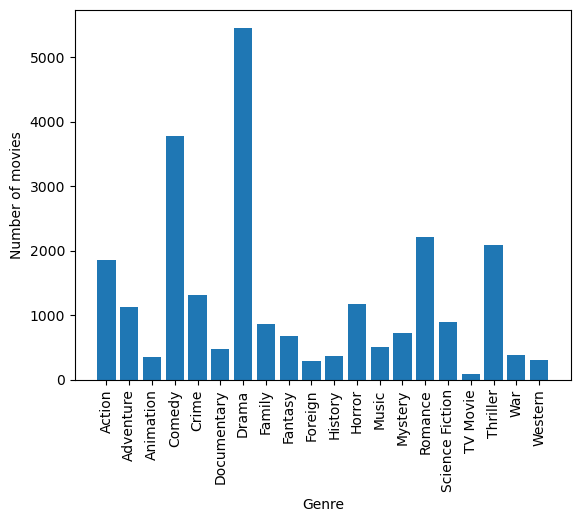

In [135]:
plt.show()
plt.bar(x = genre_count.index ,height=genre_count.values)
plt.xlabel("Genre")
plt.ylabel("Number of movies")
plt.xticks(rotation = 90)
plt.show()

Highest number of movies: Daram, Comdey

In [136]:
#take sample
sample_ratings = clean_ratings_df.sample(frac=0.2)

In [137]:
sample_ratings.head(1)

,userId,movieId,rating
10291564,106216,2571,4.5


In [138]:
final_movies_df.head(1)

,movieId,genres,id,imdb_id,original_language,original_title,overview,popularity,release_date,runtime,spoken_languages,title,vote_average,vote_count,rating
0,1,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15 00:00:00,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,3.89


In [139]:
len(final_movies_df[final_movies_df['original_language'] == 'en'].values)

9056

In [140]:
final_movies_df.shape[0]

11008

out of `11008` movies: `9056`movies have `English` as their original language.

In [141]:
#converting genres column from list ot strings
final_movies_df['genre'] = [','.join(map(str, l)) for l in final_movies_df['genres']]



In [142]:
final_movies_df.dtypes

movieId                int64
genres                object
id                    object
imdb_id               object
original_language     object
original_title        object
overview              object
popularity            object
release_date          object
runtime               object
spoken_languages      object
title                 object
vote_average          object
vote_count            object
rating               float64
genre                 object
dtype: object

In [143]:
final_movies_df['genre'].dropna(inplace=True)

In [144]:
final_movies_df.isnull().sum()

movieId              0
genres               0
id                   0
imdb_id              0
original_language    0
original_title       0
overview             0
popularity           0
release_date         0
runtime              0
spoken_languages     0
title                0
vote_average         0
vote_count           0
rating               0
genre                0
dtype: int64

In [145]:
final_movies_df.to_csv("movies.csv" , index= False)

In [146]:
clean_ratings_df.to_csv("ratings.csv" , index=False)